# Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyesapi
import atexit

# Open api and patient

In [2]:
app = pyesapi.CustomScriptExecutable.CreateApplication('python_demo') # Create an instance of ESAPI application
atexit.register(app.Dispose) 

# This line ensures that the application instance will be properly disposed of when the script exits. 
# The atexit module in Python allows you to register functions to be executed upon normal interpreter termination. 
# By registering app.Dispose, it ensures that the Dispose method of the app instance is called when the script ends. 
# This is important for cleanup and to ensure that any resources held by the ESAPI application are released properly.


<bound method 'Dispose'>

# Opening a patient

In [3]:
app.ClosePatient() # Close the previous patient
patient_id = "3097243"  # defind patient ID
patient = app.OpenPatientById(patient_id) #open that patient

## Accessing ESAPI Elements with the "Lot" Object

ESAPI uses the `Lot` object to access each element. For example, `patient.CoursesLot()` will return an ESAPI object containing all courses for that patient.

### Methods to Access Objects Inside Courses:

1. **Access by ID:**
   ```python
   patient.CoursesLot('C1_Dec2020')

2. **Access by indexing:**
   ```python
   patient.CoursesLot(0)  # This will access the first course

3. **Convert to Enumerable Object Using List and Access by Index::**
   ```python
   list(patient.CoursesLot())[0]  # This will access the first course

4. **Loop through the object**
   ```python
   courses = patient.Courses
   for course in courses:
      print('---------------')
      # Print course ID
      print(f'Course Id: {course.Id}')

Useful Tips
- Use the `ToString()` method to return a human-readable representation of an ESAPI object.
- Use `dir()` to return all available attributes or methods.

# Entering a course

After entering a patient, we can enter a course of that patient and access element of that course.

In [4]:
# Get the list of courses for the patient
courses = patient.Courses

# Loop throught the course
for course in courses:
    print('---------------')
    # print course ID
    print(f'Course Id: {course.Id}')
    #Check if the course has plans or not
    print(f'Number of plans in the course: {len(list(course.PlanSetupsLot()))}')
    print(f'Number of plan sum in the course: {len(list(course.PlanSumsLot()))}')   
    print(f'Number of sessions associated with the course: {len(list(course.TreatmentSessionsLot()))}')   
    try:
        if len(list(course.TreatmentSessionsLot())) > 1: #Set it to > 1 to print only course which has assosiated session > 1 times
            print(f'First treatmend date time is: {list(course.TreatmentSessionsLot())[0].get_HistoryDateTime()}')
            print(f'Last treatmend date time is: {list(course.TreatmentSessionsLot())[-1].get_HistoryDateTime()}')
        else:
            print(f'The course has not been delivered for > 1 fractions')
    except:
        print('Something Went wrong')
        
print('---------------')   

---------------
Course Id: C1_Dec2020
Number of plans in the course: 7
Number of plan sum in the course: 1
Number of sessions associated with the course: 20
First treatmend date time is: 04/01/2021 12:36:39
Last treatmend date time is: 26/01/2021 15:45:51
---------------


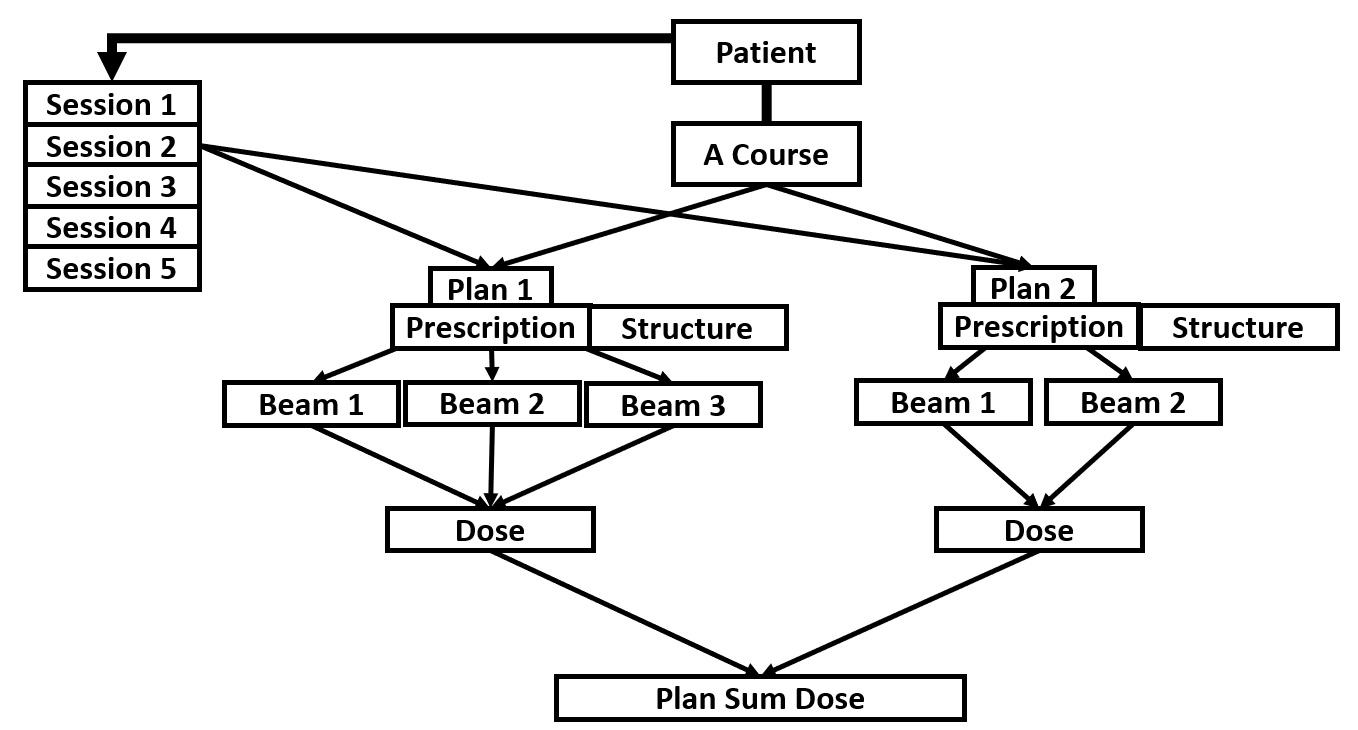

In [5]:
# Select what course you want to use
course_use_Id = 'C1_Dec2020' #Define course ID
course_use = patient.CoursesLot(course_use_Id) # Entering a course
print(f'In the course: {course_use}')

In the course: C1_Dec2020


# Get plan

After entering a course, we can then access each plan and get various informations form the plan.
As with course, plans can be accessed though `PlanSetupsLot()`

In [6]:
print(f"In course {course_use}, the plans are: \n")
for plan in course_use.PlanSetupsLot(): #Loop through all plan in the course
    print('---------------')
    print(f'Plan Id: {plan.Id}')
    print(f'Dose Per Fx: {plan.PrescribedDosePerFraction}')
    print(f'No of Fx: {plan.NumberOfFractions}')
    if str(plan.PrescribedDosePerFraction) != 'N/A': #If the course has plan with prescribed dose, lop through the plan
        completed_session_number = 0 #initiate complete session count
        print(f'Planned Dose: {plan.PrescribedDosePerFraction.Dose * plan.NumberOfFractions}') #Get planend dose just by multiplying
        print('Treatment Session Associated with the plans:')
        for session in plan.TreatmentSessionsLot(): #Loop through treatment session for the plan. THis is called the PlanTreatmentSession
            if session.Status == 3: #If the status is 3, whcih is complete
                completed_session_number += 1 #Update the count
            else:
                pass
            print(session.ToString() + f' - Status: {str(session.Status)}') #Print the name and the session status
        print(f'Total number of completed treatment session: {completed_session_number}')
        print(f'Is the planned fraction equal tot he number of completed fraction?: {plan.NumberOfFractions == completed_session_number}')
    else: # If there is no prscribed dose in the plan
        print('Planned Dose: No prescription')
        
print('---------------')        
print('Status: 1 = treat, 2 = Resume, 3 = completed, 4 = completed partially,  5 = inactive, 6 = inactive resume') #See ESAPi online help for mroe details


In course C1_Dec2020, the plans are: 

---------------
Plan Id: 1:3DRBre16F
Dose Per Fx: 266.0 cGy
No of Fx: 16
Planned Dose: 4256.0
Treatment Session Associated with the plans:
S1 - 1:3DRBre16F - Status: 3
S2 - 1:3DRBre16F - Status: 3
S3 - 1:3DRBre16F - Status: 3
S4 - 1:3DRBre16F - Status: 3
S5 - 1:3DRBre16F - Status: 3
S6 - 1:3DRBre16F - Status: 3
S7 - 1:3DRBre16F - Status: 3
S8 - 1:3DRBre16F - Status: 3
S9 - 1:3DRBre16F - Status: 3
S10 - 1:3DRBre16F - Status: 3
S11 - 1:3DRBre16F - Status: 3
S12 - 1:3DRBre16F - Status: 3
S13 - 1:3DRBre16F - Status: 3
S14 - 1:3DRBre16F - Status: 3
S15 - 1:3DRBre16F - Status: 3
S16 - 1:3DRBre16F - Status: 3
Total number of completed treatment session: 16
Is the planned fraction equal tot he number of completed fraction?: True
---------------
Plan Id: 2:EBoost4F
Dose Per Fx: 250.0 cGy
No of Fx: 4
Planned Dose: 1000.0
Treatment Session Associated with the plans:
S17 - 2:EBoost4F - Status: 3
S18 - 2:EBoost4F - Status: 3
S19 - 2:EBoost4F - Status: 3
S20 - 

In [7]:
# Get plan by plan ID
plan_use_Id = '1:3DRBre16F'
plan_use = course_use.PlanSetupsLot(plan_use_Id)
print(f'In the plan: {plan_use}')

In the plan: 1:3DRBre16F


In [8]:
# See all avaliable properties and method of the plan object
dir(plan_use)

['AddArcBeam',
 'AddConformalArcBeam',
 'AddFixedSequenceBeam',
 'AddImagingSetup',
 'AddMLCArcBeam',
 'AddMLCBeam',
 'AddMLCSetupBeam',
 'AddMultipleStaticSegmentBeam',
 'AddReferencePoint',
 'AddSetupBeam',
 'AddSlidingWindowBeam',
 'AddSlidingWindowBeamForFixedJaws',
 'AddStaticBeam',
 'AddVMATBeam',
 'AddVMATBeamForFixedJaws',
 'ApplicationScriptLogs',
 'ApplicationScriptLogsLot',
 'ApprovalHistory',
 'ApprovalHistoryLot',
 'ApprovalStatus',
 'AttachToCalcClient',
 'BaseDosePlanningItem',
 'Beams',
 'BeamsLot',
 'CalculateDVHEstimates',
 'CalculateDVHEstimatesImpl',
 'CalculateDose',
 'CalculateDoseWithPresetValues',
 'CalculateLeafMotions',
 'CalculateLeafMotionsAndDose',
 'ClearCalculationModel',
 'ClearSerializationHistory',
 'Comment',
 'CopyEvaluationDose',
 'Course',
 'CreateEvaluationDose',
 'CreationDateTime',
 'CreationUserName',
 'DVHEstimates',
 'DVHEstimatesLot',
 'DetachFromCalcClient',
 'Dose',
 'DoseAsEvaluationDose',
 'DosePerFraction',
 'DosePerFractionInPrimaryRef

# Get structure

Structures are stored in a "structure set"

In [9]:
print(f'In plan \'{plan_use}\'')
structure_set = plan_use.StructureSet # define the structure set

print('Structures are:')
for structure in structure_set.Structures: # Loope thrpugh all the structure in the strucure set
    # Access the structure set of the plan
    # Print the list of structure names
    print(f'-{structure.Id}')

In plan '1:3DRBre16F'
Structures are:
-BODY
-Tumor bed
-Breast_R
-Heart
-Lung_R
-SpinalCord
-Skin_whole_body_3_mm
-Skin_chest_3_mm
-Skin_neck_3_mm
-Skin_whole_body_5_mm
-Skin_chest_5_mm
-Skin_neck_5_mm
-Skin_whole_body_7_mm
-Skin_chest_7_mm
-Skin_neck_7_mm
-Skin_whole_body_10_mm
-Skin_chest_10_mm
-Skin_neck_10_mm
-Skin_whole_body_0.5-10_mm
-Skin_chest_0.5-10_mm
-Skin_neck_0.5-10_mm


# Get image

A structre set is associated with image(s).

In [10]:
#Get the image which is associated with that structure
image = structure_set.Image

In [11]:
# Get image information
print(f'ID: {image.Id}')
print(f'Creation date: {image.CreationDateTime}')
print(f'Series: {image.Series}')
print(f'Study: {image.Series.Study.Id}')
print(f'Series UID: {image.Series.UID}')
print(f'X size is: {image.XSize}')
print(f'X resolution is: {image.XRes}')
print(f'Y size is: {image.YSize}')
print(f'Y resolution is: {image.YRes}')
print(f'Z size is: {image.ZSize}')
print(f'Z resolution is: {image.ZRes}')


ID: CT_1
Creation date: 25/12/2020 10:52:12
Series: Series
Study: 20827
Series UID: 1.2.840.113619.2.278.3.101350480.823.1608854868.971
X size is: 512
X resolution is: 0.917969
Y size is: 512
Y resolution is: 0.917969
Z size is: 155
Z resolution is: 2.5


Image can be converted into 3D array with built-in method. <br>
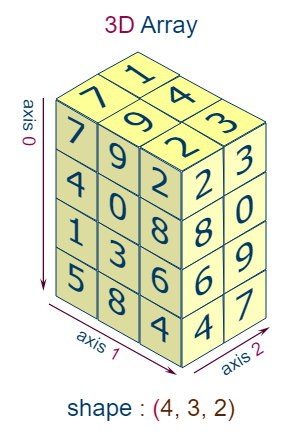 <br>
https://www.w3resource.com/python-exercises/list/python-data-type-list-exercise-13.php

In [12]:
# Convert image object into 3d array.
image_array = image.np_array_like()

In [13]:
image_array

array([[[30768., 30768., 30768., ..., 30768., 30768., 30768.],
        [30768., 30768., 30768., ..., 30768., 30768., 30768.],
        [30768., 30768., 30768., ..., 30768., 30768., 30768.],
        ...,
        [30768., 30768., 30768., ..., 30768., 30768., 30768.],
        [30768., 30768., 30768., ..., 30768., 30768., 30768.],
        [30768., 30768., 30768., ..., 30768., 30768., 30768.]],

       [[30768., 30768., 30768., ..., 30768., 30768., 30768.],
        [30768., 30768., 30768., ..., 30768., 30768., 30768.],
        [30768., 30768., 30768., ..., 30768., 30768., 30768.],
        ...,
        [30768., 30768., 30768., ..., 30768., 30768., 30768.],
        [30768., 30768., 30768., ..., 30768., 30768., 30768.],
        [30768., 30768., 30768., ..., 30768., 30768., 30768.]],

       [[30768., 30768., 30768., ..., 30768., 30768., 30768.],
        [30768., 30768., 30768., ..., 30768., 30768., 30768.],
        [30768., 30768., 30768., ..., 30768., 30768., 30768.],
        ...,
        [307

We can then use properties and method from numpy and others to manipulate the array as usual.

In [14]:
print(f'Shape of array is: {image_array.shape}')
print(f'Min value of array is: {image_array.min()}')
print(f'Max value of array is: {image_array.max()}')

Shape of array is: (512, 512, 155)
Min value of array is: 30768.0
Max value of array is: 36863.0


The number is the raw value of array. To convert to HU, you can apply the formular:

$$ \text{HU} = \left( \frac{\text{Pixel Value} - \text{Intercept}}{\text{Slope}} \right) $$

In this formula:

- **Pixel Value**: The value of the pixel in the CT image.
- **Intercept**: The value that represents the CT number of water.
- **Slope**: The scaling factor for the CT numbers.

Usually, in most CT scanners, the Slope is set to 1, and the Intercept can vary depending on the calibration of the scanner. Often, you might see the formula simplified if the Slope is 1:

$$ \text{HU} = \text{Pixel Value} + \text{Intercept} $$

The slope and intercept values can be found in the DICOM metadata of the CT images.


In ESAPI, I have not found the method to obtain intercept and slope (if you do please tell me).

We can, however, use the built-in method `VoxelToDisplayValue()` to convert the pixel value to HU.

In [15]:
#Conversion of raw pixel value into HU:
print(f'Min value of array is: {image_array.min()}')
print(f'Max value of array is: {image_array.max()}')
print(f'Min HU of array is: {image.VoxelToDisplayValue(image_array.min())}')
print(f'Max HU of array is: {image.VoxelToDisplayValue(image_array.max())}')

Min value of array is: 30768.0
Max value of array is: 36863.0
Min HU of array is: -3024.0
Max HU of array is: 3071.0


And with that, we can calculate the slope and intercept ourselves since it is just linear algebra.

In [16]:
x = np.array([30768, 36863])
y = np.array([-3024, 3071])
z = np.polyfit(x, y, 1).tolist()
new_list = [float(i) for i in z]
slope, intercept = new_list[0], round(new_list[1])
slope, intercept

(1.0, -33792)

Since we get the image as 3D array, we can plot the image.

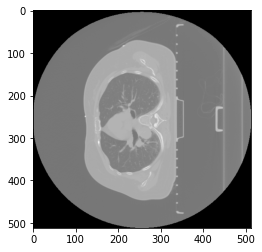

In [17]:
#Plot the image 
slice_num = 90

# Display the CT slice at slice_num
plt.imshow(image_array[:, :, slice_num], cmap='gray')

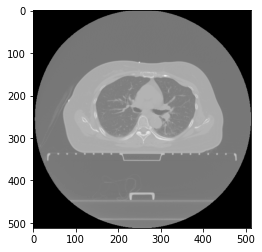

In [18]:
# Rotate it by transposing
plt.imshow(image_array[:, :, slice_num].T, cmap='gray')

We can convert structure to boolean mask.

In [19]:
# Define structure
structure = 'BODY'
structure_use = structure_set.StructuresLot(structure)

# Convert structure to boolean mask
structure_mask = structure_use.np_mask_like(image)

In [20]:
structure_mask

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

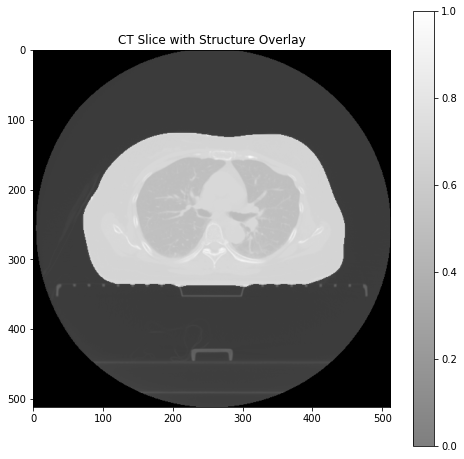

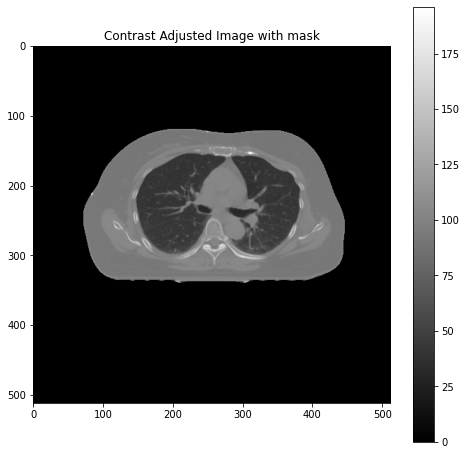

In [21]:
slice_num = 90

# Get the CT slice and the corresponding structure mask slice
ct_slice = image_array[:, :, slice_num]
structure_slice = structure_mask[:, :, slice_num]

# Plot the original CT slice with the structure overlay
plt.figure(figsize=(8, 8))

plt.imshow(ct_slice.T, cmap='gray')
plt.imshow(structure_slice.T, cmap='gray', alpha=0.5) # Overlay the structure with transparency
plt.title('CT Slice with Structure Overlay')
plt.colorbar()
plt.show()

# Normalize the image and plot
masked_ct_slice = np.where(structure_slice==1, ct_slice, 0)
image_normalized = (masked_ct_slice / masked_ct_slice.max())*2500

# Convert to uint8
image_normalized = image_normalized.astype(np.uint8)

# Display the adjusted image
plt.figure(figsize=(8, 8))

plt.imshow(image_normalized.T, cmap='gray')
plt.title('Contrast Adjusted Image with mask')
plt.colorbar()
plt.show()

# Get dose of the plan

We can get the dose as 3D array as well.

In [22]:
print(f'In plan: {plan_use}')

In plan: 1:3DRBre16F


In [23]:
# Check if the course has associated plans
if plan_use.Dose:
    
    # Access the dose of the plan
    dose = plan_use.Dose
    
    # Convert the dose to a numpy array
    dose_array = dose.np_array_like(image) 
    
    # This will upscale the dose to the same resolution as CT and won't get the original resolution dose grid.
    
else:
    print("The course does not have calculated dose.")

In [24]:
dose_array[:, :, :]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

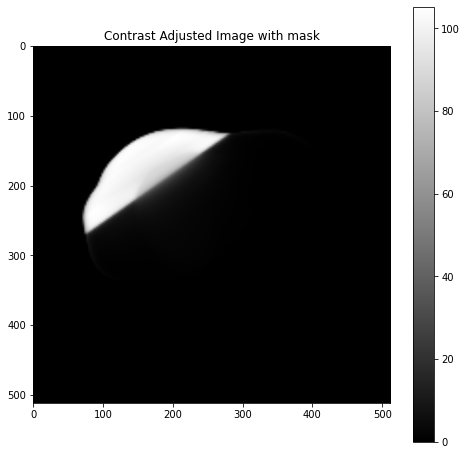

In [25]:
# Plot the dose
dose_slice = dose_array[:,:,slice_num]
plt.figure(figsize=(8, 8))

plt.imshow(dose_slice.T, cmap='gray')
plt.title('Contrast Adjusted Image with mask')
plt.colorbar()
plt.show()

The dose array is in relative dose (%).

In [26]:
print(f'The max dose is: {dose_array.max():.2f}%')

The max dose is: 105.69%


# Calculating DVH

We can generate DVH object form structures and plan.

In [27]:
# Define structure
structure = 'Lung_R'
structure_use = structure_set.StructuresLot(structure)

print(f'In plan: {plan_use.Id}')
print(f'Getting DVH for: {structure_use.Id}')

dvh = plan_use.GetDVHCumulativeData(
        structure_use,
        pyesapi.DoseValuePresentation.Absolute,
        pyesapi.VolumePresentation.AbsoluteCm3,
        0.1 # precision of binning in cGy. 1 cGY means bin every 1 cGy. Binning effect both cumulative and differntial DVH but it affect differntial DVH more.
    )

In plan: 1:3DRBre16F
Getting DVH for: Lung_R


In [28]:
dvh

In [29]:
dvh.MeanDose.Dose

796.2822256621154

In [30]:
#Collect the dose and volume from DVH object. We collect cumulative DVH first
dose_x = [p.DoseValue.Dose for p in dvh.CurveData] #dose X will start from 0
cul_volume_y = [p.Volume for p in dvh.CurveData]

In [31]:
dose_x

[0.0,
 0.1,
 0.2,
 0.30000000000000004,
 0.4,
 0.5,
 0.6,
 0.7,
 0.7999999999999999,
 0.8999999999999999,
 0.9999999999999999,
 1.0999999999999999,
 1.2,
 1.3,
 1.4000000000000001,
 1.5000000000000002,
 1.6000000000000003,
 1.7000000000000004,
 1.8000000000000005,
 1.9000000000000006,
 2.0000000000000004,
 2.1000000000000005,
 2.2000000000000006,
 2.3000000000000007,
 2.400000000000001,
 2.500000000000001,
 2.600000000000001,
 2.700000000000001,
 2.800000000000001,
 2.9000000000000012,
 3.0000000000000013,
 3.1000000000000014,
 3.2000000000000015,
 3.3000000000000016,
 3.4000000000000017,
 3.5000000000000018,
 3.600000000000002,
 3.700000000000002,
 3.800000000000002,
 3.900000000000002,
 4.000000000000002,
 4.100000000000001,
 4.200000000000001,
 4.300000000000001,
 4.4,
 4.5,
 4.6,
 4.699999999999999,
 4.799999999999999,
 4.899999999999999,
 4.999999999999998,
 5.099999999999998,
 5.1999999999999975,
 5.299999999999997,
 5.399999999999997,
 5.4999999999999964,
 5.599999999999996,
 5.

In [32]:
cul_volume_y

[1337.1483784312054,
 1337.1483784312054,
 1337.1483784312054,
 1337.1483784312054,
 1337.1483784312054,
 1337.1483784312054,
 1337.1483784312054,
 1337.1483784312054,
 1337.1483784312054,
 1337.1483784312054,
 1337.1483784312054,
 1337.1483784312054,
 1337.1483784312054,
 1337.1483784312054,
 1337.1483784312054,
 1337.1483784312054,
 1337.1483784312054,
 1337.1483784312054,
 1337.1483784312054,
 1337.1483784312054,
 1337.1483784312054,
 1337.1483784312054,
 1337.1483784312054,
 1337.1483784312054,
 1337.1483784312054,
 1337.1483784312054,
 1337.1483784312054,
 1337.1483784312054,
 1337.1483784312054,
 1337.1483784312054,
 1337.1483784312054,
 1337.1483784312054,
 1337.1483784312054,
 1337.1483784312054,
 1337.1483784312054,
 1337.1483784312054,
 1337.1483784312054,
 1337.1483784312054,
 1337.1483784312054,
 1337.1483784312054,
 1337.1483784312054,
 1337.1483784312054,
 1337.1483784312054,
 1337.1483784312054,
 1337.1483784312054,
 1337.1483784312054,
 1337.1483784312054,
 1337.1483784

In [33]:
print(f'Dose at index 5000 is: {dose_x[5000]:.2f} cGy')
print(f'Volume at index 5000 is: {cul_volume_y[5000]:.2f} cm3')
print(f'V{dose_x[5000]:.2f} cGy = {cul_volume_y[5000]:.2f} cm3')


Dose at index 5000 is: 500.00 cGy
Volume at index 5000 is: 373.93 cm3
V500.00 cGy = 373.93 cm3
